<a href="https://colab.research.google.com/github/irma5hourglass/image-classification/blob/main/PALING_TINGGI_hushem70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rarfile

In [ ]:
import rarfile, os

# Lokasi file .rar
local_rar = '/content/drive/MyDrive/HuSHem.rar'

# Membuka file .rar
with rarfile.RarFile(local_rar, 'r') as rar_ref:
    # Mengekstrak semua file ke direktori tujuan
    rar_ref.extractall('/tmp')

# File .rar otomatis ditutup setelah blok with selesai

In [ ]:
import random
import tensorflow as tf
import numpy as np
# Set random seed untuk reproducibility
seed = 42

In [ ]:
#tf.config.experimental.enable_op_determinism()

In [ ]:
import os
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

base_dir = '/tmp/HuSHem'

# Directories to store the split data
train_dir = '/tmp/train'
validation_dir = '/tmp/validation'
test_dir = '/tmp/test'

# Function to clear a directory
def clear_directory(dir_path):
    """Remove all files and subdirectories in the specified directory."""
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
    os.makedirs(dir_path, exist_ok=True)  # Recreate the directory

# Clear the directories before processing
clear_directory(train_dir)
clear_directory(validation_dir)
clear_directory(test_dir)

# Classes within the HuSHem directory
classes = ['01_Normal', '02_Tapered', '03_Pyriform', '04_Amorphous']

# Define the cropping size
crop_size = (105, 105)  # example crop size (width, height)

def crop_center(image, size):
    """Crop the image to the center with the given size."""
    width, height = image.size
    new_width, new_height = size
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    return image.crop((left, top, right, bottom))

# Augmentation settings
train_datagen = ImageDataGenerator(rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

for cls in classes:
    cls_dir = os.path.join(base_dir, cls)
    images = os.listdir(cls_dir)

    # List to store all images (original + augmented)
    augmented_images = []

    # Crop and augment all images before splitting
    for image_name in images:
        img_path = os.path.join(cls_dir, image_name)
        img = Image.open(img_path)
        img_cropped = crop_center(img, crop_size)
        img_cropped_array = np.expand_dims(np.array(img_cropped), axis=0)  # Convert to numpy array

        # Save original cropped image to augmented_images list
        augmented_images.append((img_cropped, cls, image_name))

        # Augment and save 4 new images for each original image
        aug_iter = train_datagen.flow(img_cropped_array, batch_size=1)
        for aug_index in range(3):  # Create 4 augmented images
            aug_image_array = next(aug_iter)[0].astype(np.uint8)  # Get augmented image
            aug_image = Image.fromarray(aug_image_array)
            aug_image_name = f"{image_name.split('.')[0]}_aug_{aug_index}.bmp"
            augmented_images.append((aug_image, cls, aug_image_name))

    # Extract only the image names for splitting
    image_names = [img[2] for img in augmented_images]

    # Split data into training, validation, and test sets
    train_val_images, test_images = train_test_split(image_names, test_size=0.05, random_state=seed)
    train_images, validation_images = train_test_split(train_val_images, test_size=0.2632, random_state=seed)

    # Create subdirectories for each class in train, validation, and test directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Save images into the appropriate directories
    for img, img_cls, img_name in augmented_images:
        if img_name in train_images:
            img.save(os.path.join(train_dir, img_cls, img_name))
        elif img_name in validation_images:
            img.save(os.path.join(validation_dir, img_cls, img_name))
        elif img_name in test_images:
            img.save(os.path.join(test_dir, img_cls, img_name))

In [ ]:
# Count the number of files in each directory
for cls in classes:
    train_count = len(os.listdir(os.path.join(train_dir, cls)))
    validation_count = len(os.listdir(os.path.join(validation_dir, cls)))
    test_count = len(os.listdir(os.path.join(test_dir, cls)))

    print(f"Class: {cls}")
    print(f"  Train: {train_count} files")
    print(f"  Validation: {validation_count} files")
    print(f"  Test: {test_count} files")
    print()

Class: 01_Normal
  Train: 151 files
  Validation: 54 files
  Test: 11 files

Class: 02_Tapered
  Train: 148 files
  Validation: 53 files
  Test: 11 files

Class: 03_Pyriform
  Train: 159 files
  Validation: 57 files
  Test: 12 files

Class: 04_Amorphous
  Train: 145 files
  Validation: 52 files
  Test: 11 files



In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training Data Generator with Augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Validation Data Generator (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Test Data Generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(170, 170),
    batch_size=68,
    shuffle=True,
    class_mode='sparse',
    seed=seed  # Set a seed for reproducibility
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(170, 170),
    batch_size=68,
    shuffle=False,
    class_mode='sparse'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(170, 170),
    batch_size=68,
    shuffle=False,
    class_mode='sparse'
)

Found 603 images belonging to 4 classes.
Found 216 images belonging to 4 classes.
Found 45 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from tensorflow.keras import regularizers

# Define the number of classes in your dataset
num_classes = 4  # Adjust this to match your number of classes

# Create the base pre-trained model
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(170, 170,3))

# Freeze the layers in the base model initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for your classification task with L2 regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)  # L2 regularization added
x = Dropout(0.5)(x)  # Adjust dropout rate if needed
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)  # L2 regularization added
x = Dropout(0.5)(x)  # Adjust dropout rate if needed
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Define the optimizer with a specific learning rate
#learning_rate = 0.001  # Adjust the learning rate as needed
#optimizer = SGD(learning_rate=0.01, momentum=0.9)
# Adam optimizer with custom parameters
optimizer = Adam(
    learning_rate=0.001,  # Learning rate
    beta_1=0.9,           # First moment decay
    beta_2=0.999,         # Second moment decay
    epsilon=1e-7          # Small constant to avoid division by zero
)
# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 170, 170, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 176, 176, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 85, 85, 64)     │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 85, 85, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 85, 85, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 87, 87, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 43, 43, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 43, 43, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 43, 43, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 43, 43, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 43, 43, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 43, 43, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 43, 43, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 43, 43, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 13,102,532 (49.98 MB)

 Trainable params: 459,652 (1.75 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [ ]:
import time
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the number of epochs
epochs = 100  # Adjust the number of epochs as needed

# Define EarlyStopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define ModelCheckpoint callback to save the best model
#checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Start timing the training process
start_time = time.time()

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
    #callbacks=[checkpoint]  # Include both callbacks
)

# End timing after training completes
end_time = time.time()

# Calculate total training time and average time per epoch
total_time = end_time - start_time
num_epochs_ran = len(history.epoch)  # Number of epochs the training actually ran
average_time_per_epoch = total_time / num_epochs_ran

print(f"Total training time: {total_time:.2f} seconds")
print(f"Average time per epoch: {average_time_per_epoch:.2f} seconds")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 123s 8s/step - accuracy: 0.3686 - loss: 1.6415 - val_accuracy: 0.6019 - val_loss: 1.0748
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.5170 - loss: 1.2089 - val_accuracy: 0.6898 - val_loss: 0.8957
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.6146 - loss: 0.9716 - val_accuracy: 0.6944 - val_loss: 0.7773
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 200ms/step - accuracy: 0.7053 - loss: 0.8342 - val_accuracy: 0.7269 - val_loss: 0.7164
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.7421 - loss: 0.7299 - val_accuracy: 0.7778 - val_loss: 0.6344
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.7972 - loss: 0.5973 - val_accuracy: 0.7963 - val_loss: 0.5848
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.7924 - loss: 0.5803 - val_accuracy: 0.8333 - val_loss: 0.5081
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.8102 - loss: 0.5199 - val_accuracy: 0.8102 - val_loss: 0.49

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

1/1 - 15s - 15s/step - accuracy: 0.9778 - loss: 0.0929

Test Accuracy: 97.78%


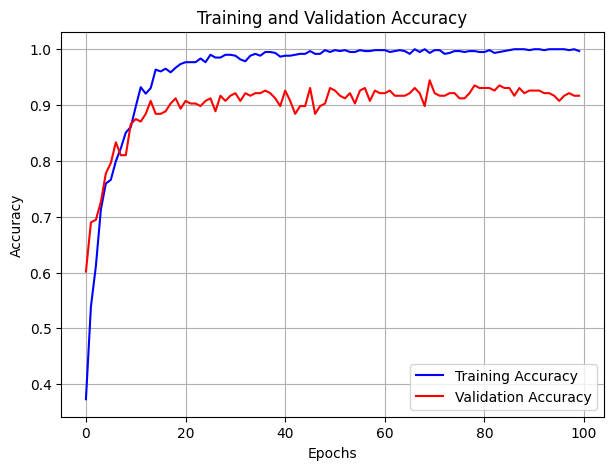

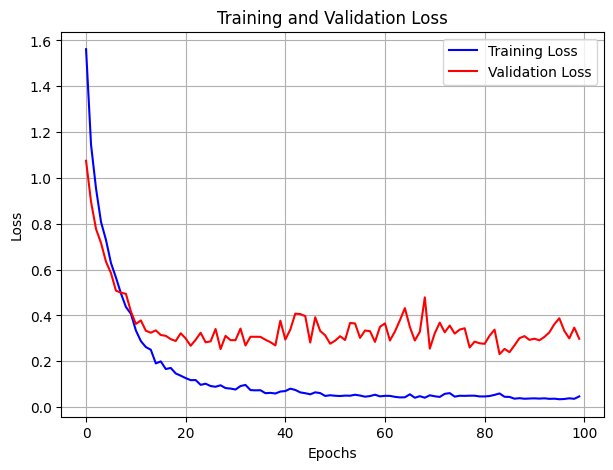

In [ ]:
import matplotlib.pyplot as plt

# Get the class names from the generator
class_names = list(train_generator.class_indices.keys())

# Retrieve a list of accuracy results on training and validation data sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of loss results on training and validation data sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.figure(figsize=(7, 5))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')  # Position the legend at the lower right
plt.grid(True)  # Adding grid lines for better readability

# Display the plot
plt.show()

# Plot training and validation loss per epoch
plt.figure(figsize=(7, 5))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')  # Position the legend at the upper right
plt.grid(True)  # Adding grid lines for better readability

# Display the plot
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


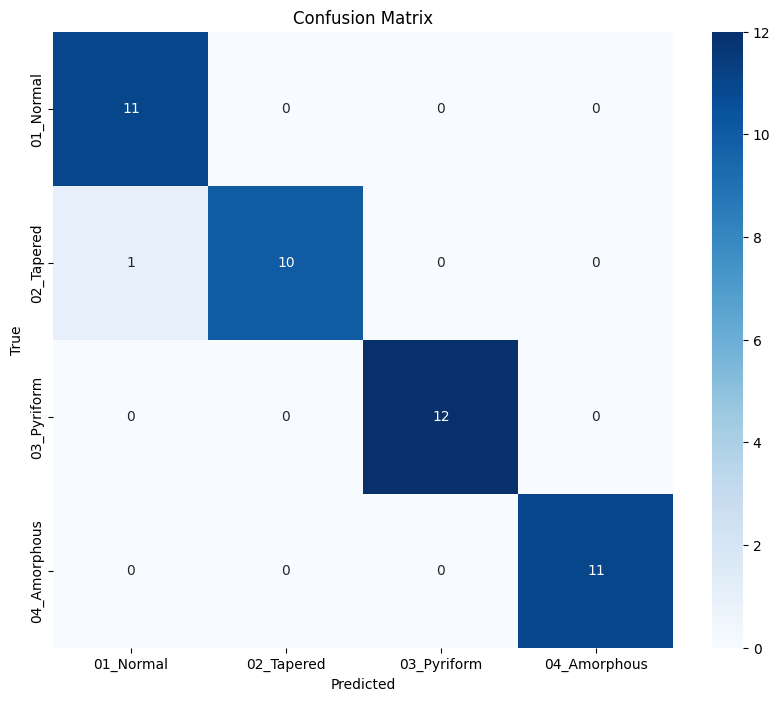

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions from the test set
test_generator.reset()  # Make sure to reset the generator
predictions = model.predict(test_generator, verbose=1)

# Get the true labels
true_labels = test_generator.classes

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=list(range(num_classes)))

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Define class names (make sure these match the order of classes in your data)
class_names = ['01_Normal', '02_Tapered', '03_Pyriform', '04_Amorphous']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Reset the test generator to ensure it starts from the beginning
test_generator.reset()

# Generate predictions
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Compute classification report
report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Print the classification report
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
              precision    recall  f1-score   support

   01_Normal       0.92      1.00      0.96        11
  02_Tapered       1.00      0.91      0.95        11
 03_Pyriform       1.00      1.00      1.00        12
04_Amorphous       1.00      1.00      1.00        11

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

